In [1]:
# Here we install all the necessary libraries
#!pip install scikit-learn
#!pip install gensim
# Installation of all the required libraries
#!pip install accelerate -U
# Utility to optimize PyTorch models for various hardware
#!pip install transformers[torch]
# Hugging Face's transformers library with PyTorch support
#!pip install torch


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from numpy import mean
# Word2Vec from gensim
from gensim.models import Word2Vec
#Classiifers - Logistic Regression, SVC, Random Forest, KNN and MLP, are trained on the training data.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.neural_network import MLPClassifier  
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold, cross_val_score
#performance and evaluation of test data using metrics - accuracy score, confusion matrix, and classification report.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [5]:
#Random Forest Model
# Function to build and evaluate a Random Forest model
def build_model_RF(X_train, y_train, X_test, y_test, name_of_test):
    # Initialization and training a Random Forest model with specified parameters
    start_time = time.time()
    rfc = RandomForestClassifier()
    #parameters
    max_depth = [3, 5, 10, None]
    min_samples_leaf = [1, 5, 10]
    min_samples_split = [2, 10, 20]
    max_features = ['log2','sqrt']

    # Grid search parameters
    grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    #Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    # Best Model
    best_model = RandomForestClassifier(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'The total time taken to train the model is {end_time-start_time} seconds')
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)
    # Printing the training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # Printing the testing accuracy
    print(
        "Test accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test)
    )

    # Printing the classification report
    print(classification_report(y_test, y_pred))
    # Printing the confusion matrix
    print(confusion_matrix(y_test,y_pred))
    # Printing precision, recall, fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    # Saving the best model
    with open('w2v_rf_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    
    return best_model

In [7]:
# Support Vector Machine model
# Function to build and evaluate a Support Vector Machine model
def build_model_SVC(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    # Initialization and training a Support Vector Machine model with specified parameters
    svc = SVC()
    #define parameters
    C = [0.1, 1, 10]
    gamma_val = ['scale', 'auto']
    kernel_val = ["rbf", "linear", "sigmoid"]

    # Grid search parameters
    grid = dict(C=C, gamma=gamma_val, kernel=kernel_val)
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    # best model
    best_model = SVC(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'The total time taken to train the model is {end_time-start_time} seconds')
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)


    # Printing the training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # Printing the testing accuracy
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    # Printing the classification report
    print(classification_report(y_test, y_pred))
    # Printing the confusion matrix
    print(confusion_matrix(y_test,y_pred))
    # Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    # Saving the best model
    with open('w2v_svc_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)  
    return best_model

In [8]:
# Logistic Regression Model
# Function to build and evaluate a Logistic Regression model
def build_model_LR(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    log_reg = LogisticRegression()
    
    #define parameters
    solvers = ['newton-cg','lbfgs','saga'] #Suitable for large datasets
    penalty = ['l2','l1']
    c_values = [100, 10, 1.0, 0.1]
    max_iter = [100, 200, 300]

    #grid_search
    grid = dict(solver = solvers, penalty = penalty, C=c_values, max_iter = max_iter)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    

    #Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    #best model
    best_model = LogisticRegression(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'The total time taken to train the model is {end_time-start_time} seconds')
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)
    # Printing the training accuracy
    print(
        "Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train)
    )
    # Printing the testing accuracy
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    # Printing the classification report
    print(classification_report(y_test, y_pred))  # Evaluating prediction ability
    # Printing the confusion matrix
    print(confusion_matrix(y_test,y_pred))

    # Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    # Save best model
    with open('w2v_lr_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    
    return best_model

In [9]:
# Building KNN model to find the best model and testing
def build_model_KNN(X_train, y_train, X_test, y_test, name_of_test):
    # Creation of an instance for KNeighborsClassifier model
    start_time = time.time()
    knn = KNeighborsClassifier()

    # Define parameters for grid search
    n_neighbors = [3, 5, 7, 9, 11]
    weights = ['uniform', 'distance']
    metric = ['euclidean', 'manhattan', 'minkowski']

    # grid_search
    grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    # Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    best_model = KNeighborsClassifier(**grid_result.best_params_)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'The total time taken to train the model is {end_time-start_time} seconds')
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    print("Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train))
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    #Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)

    #Save the best knn model
    with open('w2v_knn_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)

    return best_model

In [10]:
# MLP (Multilayer Perceptron) model
def build_model_MLP(X_train, y_train, X_test, y_test, name_of_test):
    start_time = time.time()
    # Creation of an instance for MLPClassifier model
    mlp = MLPClassifier(max_iter=1000)

    # Define parameters for grid search
    hidden_layer_sizes = [(50,), (100,), (50,50), (100,50), (100,100)]
    activation = ['tanh', 'relu']
    solver = ['adam', 'sgd']
    alpha = [0.0001, 0.05]
    learning_rate = ['constant','adaptive']

    # grid_search
    grid = dict(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate=learning_rate)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    grid_search = GridSearchCV(estimator=mlp, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    # Results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    best_model = MLPClassifier(**grid_result.best_params_, max_iter=1000)
    best_model.fit(X_train, y_train)
    end_time = time.time()
    print(f'The total time taken to train the model is {end_time-start_time} seconds')
    # Prediction of labels for the test set
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    print("Training accuracy of " + name_of_test + ": ", best_model.score(X_train, y_train))
    print("Testing accuracy of " + name_of_test + ": ", best_model.score(X_test, y_test))

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    # Calculation of precision, recall and fscore
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("tn:",tn)
    print("fp:",fp)
    print("fn:",fn)
    print("tp:",tp)
    
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    #Saving the best mlp model
    with open('w2v_mlp_model2.pkl', 'wb') as file:
        pickle.dump(best_model, file)

    return best_model

In [57]:
# Word2Vec Feature Extractor 
def transform_w2v(training, testing, column_name, vector_size=100, min_count=1):

    training[column_name] = training[column_name].fillna('')
    testing[column_name] = testing[column_name].fillna('')

    training_tokens = [text.split() for text in training[column_name]]
    testing_tokens = [text.split() for text in testing[column_name]]
    len_train_token = sum(len(list) for list in training_tokens)
    len_test_token = sum(len(list) for list in testing_tokens)
    print(len_train_token)
    print(len_test_token)
    w2v_model = Word2Vec(sentences=training_tokens, vector_size=vector_size, min_count=min_count)

    training_embeddings = np.array([np.mean([w2v_model.wv[word] for word in words if word in w2v_model.wv] or [np.zeros(vector_size)], axis=0)
                                    for words in training_tokens])
    training_embeddings_df = pd.DataFrame(training_embeddings)

    testing_embeddings = np.array([np.mean([w2v_model.wv[word] for word in words if word in w2v_model.wv] or [np.zeros(vector_size)], axis=0)
                                   for words in testing_tokens])
    testing_embeddings_df = pd.DataFrame(testing_embeddings)

    return w2v_model, training_embeddings_df, testing_embeddings_df

In [59]:
# Loading trainig data
df_train = pd.read_csv("Dataset1_2Train_new3.csv")
print("...successfully loaded training data")
print("Total length of training data: ", len(df_train))

# Loading testing data
df_test = pd.read_csv("Dataset1_2Test_new3.csv")
print("...successfully loaded testing data")
print("Total length of testing data: ", len(df_test))

# Create W2V features for training set
w2v_vect_fit, df_train_w2v_unstem, df_test_w2v_unstem = transform_w2v(
    df_train, df_test, "final_cleaned_text"
)
# Load the fitted W2V vectors into file
with open('w2v_vect_fit2.pkl', 'wb') as file:
        pickle.dump(w2v_vect_fit, file)
    
print("Successfully created the W2V data")



...successfully loaded training data
Total length of training data:  120000
...successfully loaded testing data
Total length of testing data:  29500
28544403
7106020
Successfully created the W2V data


In [34]:
#Best Model for W2V and LR
w2v_lr_best_model = build_model_LR(
    df_train_w2v_unstem,
    df_train["label"],
    df_test_w2v_unstem,
    df_test["label"],
    "W2V LR",
)

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages

0.990258 (0.001210) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990292 (0.001125) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989900 (0.000981) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.989900 (0.000981) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.990258 (0.001210) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990292 (0.001125) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
0.990025 (0.001050) with: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'lbfgs

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [38]:
#Best Model for W2V and KNN
w2v_knn_best_model = build_model_KNN(
    df_train_w2v_unstem,
    df_train["label"],
    df_test_w2v_unstem,
    df_test["label"],
    "W2V KNN",
)

0.992183 (0.000837) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.993158 (0.000680) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.991042 (0.000938) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.992392 (0.000744) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.990400 (0.000846) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.991975 (0.000637) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.989767 (0.000823) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.991542 (0.000615) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.989117 (0.000880) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
0.991083 (0.000599) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
0.991983 (0.000766) with: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
0.9

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Training accuracy of W2V KNN:  0.9999916666666666


C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Testing accuracy of W2V KNN:  0.9949491525423729
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     24000
           1       1.00      0.97      0.99      5500

    accuracy                           0.99     29500
   macro avg       1.00      0.99      0.99     29500
weighted avg       0.99      0.99      0.99     29500

[[23995     5]
 [  144  5356]]
tn: 23995
fp: 5
fn: 144
tp: 5356
Precision: 0.9990673381831748
Recall: 0.9738181818181818
FScore: 0.986281189577387


In [39]:
#Best Model for W2V and MLP
w2v_mlp_best_model = build_model_MLP(
    df_train_w2v_unstem,
    df_train["label"],
    df_test_w2v_unstem,
    df_test["label"],
    "W2V MLP",
)

0.996667 (0.000735) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
0.990517 (0.001199) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.996758 (0.000474) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.990658 (0.001225) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.996925 (0.000530) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.990550 (0.001134) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.996650 (0.000501) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.9905

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [40]:
#Best Model for W2V and RF
w2v_rf_best_model = build_model_RF(
    df_train_w2v_unstem,
    df_train["label"],
    df_test_w2v_unstem,
    df_test["label"],
    "W2V RF",
)

0.959725 (0.002022) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.959717 (0.001333) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
0.959942 (0.001749) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 20}
0.959225 (0.001257) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}
0.959642 (0.001804) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10}
0.959633 (0.001914) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 20}
0.959725 (0.001225) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2}
0.959258 (0.001689) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10}
0.959483 (0.001296) with: {'max_depth': 3, 'max_features': 'log2', 'min_samples_l

C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training accuracy of W2V RF:  0.9999916666666666


C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test accuracy of W2V RF:  0.994135593220339
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     24000
           1       1.00      0.97      0.98      5500

    accuracy                           0.99     29500
   macro avg       1.00      0.99      0.99     29500
weighted avg       0.99      0.99      0.99     29500

[[23985    15]
 [  158  5342]]
tn: 23985
fp: 15
fn: 158
tp: 5342
Precision: 0.9971999253313422
Recall: 0.9712727272727273
FScore: 0.9840655798102607


In [41]:
#Best Model for W2V and SVC
w2v_svc_best_model = build_model_SVC(
    df_train_w2v_unstem,
    df_train["label"],
    df_test_w2v_unstem,
    df_test["label"],
    "W2V SVC",
)

The total time taken to train the model is 10125.469294548035 seconds


C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Training accuracy of W2V SVC:  0.9986166666666667


C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Testing accuracy of W2V SVC:  0.9977627118644068
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24000
           1       1.00      0.99      0.99      5500

    accuracy                           1.00     29500
   macro avg       1.00      0.99      1.00     29500
weighted avg       1.00      1.00      1.00     29500

[[23986    14]
 [   52  5448]]
tn: 23986
fp: 14
fn: 52
tp: 5448
Precision: 0.997436836323691
Recall: 0.9905454545454545
FScore: 0.9939792008757526


In [42]:
#Testing Data
df_test1 = pd.read_csv("Dataset2_2Train_new2.csv")
df_test2 = pd.read_csv("Dataset2_2Test_new2.csv")
df_test = pd.concat([df_test1, df_test2], axis=0, ignore_index=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

X_test1 = df_test['final_cleaned_text'].values
y_test1 = df_test['label'].values

In [43]:
#Feature Extraction for Testing data
def document_vector(w2v_model, doc):
    words = doc.split()
    words = [word for word in words if word in w2v_model.wv.key_to_index]
    if len(words) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(w2v_model.wv[words], axis=0)

def transform_w2v(X_test, w2v_model):
    X_test_vectors = np.array([document_vector(w2v_model, doc) for doc in X_test])
    return X_test_vectors

In [44]:
#Testing of W2V features of testing data using MLP
def check_best_model_MLP(X_test, y_test, w2v_mlp_best_model, w2v_vect_fit):
    start_time = time.time()
    X_test = pd.Series(X_test)  
    X_test = X_test.fillna('')  
    X_test_feature = transform_w2v(X_test, w2v_vect_fit)
    y_pred = w2v_mlp_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    end_time = time.time()
    print(f"The total testing time is {end_time-start_time} seconds")
check_best_model_MLP(X_test1, y_test1, w2v_mlp_best_model, w2v_vect_fit)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     22458
           1       0.77      0.93      0.84      4491

    accuracy                           0.94     26949
   macro avg       0.88      0.94      0.90     26949
weighted avg       0.95      0.94      0.94     26949

[[21220  1238]
 [  309  4182]]
Precision: 0.7715867158671587
Recall: 0.9311957247828991
FScore: 0.8439108061749572
Testing Accuracy: 0.9425952725518573
The total testing time is 7.151141405105591 seconds


In [45]:
#Testing of W2V features of testing data using KNN
def check_best_model_KNN(X_test, y_test, w2v_knn_best_model, w2v_vect_fit):
    start_time = time.time()
    X_test = pd.Series(X_test)  
    X_test = X_test.fillna('')  
    X_test_feature = transform_w2v(X_test, w2v_vect_fit)
    y_pred = w2v_knn_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    end_time = time.time()
    print(f"The total testing time is {end_time-start_time} seconds")
check_best_model_KNN(X_test1, y_test1, w2v_knn_best_model, w2v_vect_fit)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22458
           1       0.93      0.66      0.77      4491

    accuracy                           0.93     26949
   macro avg       0.93      0.83      0.87     26949
weighted avg       0.93      0.93      0.93     26949

[[22221   237]
 [ 1516  2975]]
Precision: 0.926214196762142
Recall: 0.6624359830772656
FScore: 0.7724263274049071
Testing Accuracy: 0.9349512041263127
The total testing time is 9.422778606414795 seconds


In [46]:
#Testing of W2V features of testing data using RF
def check_best_model_RF(X_test, y_test, w2v_rf_best_model, w2v_vect_fit):
    start_time = time.time()
    X_test = pd.Series(X_test)  
    X_test = X_test.fillna('')  
    X_test_feature = transform_w2v(X_test, w2v_vect_fit)
    y_pred = w2v_rf_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    end_time = time.time()
    print(f"The total testing time is {end_time-start_time} seconds")
check_best_model_RF(X_test1, y_test1, w2v_rf_best_model, w2v_vect_fit)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22458
           1       0.85      0.77      0.81      4491

    accuracy                           0.94     26949
   macro avg       0.90      0.87      0.88     26949
weighted avg       0.94      0.94      0.94     26949

[[21846   612]
 [ 1049  3442]]
Precision: 0.8490379871731623
Recall: 0.7664217323535961
FScore: 0.8056173200702166
Testing Accuracy: 0.9383650599280122
The total testing time is 7.37089729309082 seconds


In [47]:
#Testing of W2V features of testing data using LR
def check_best_model_LR(X_test, y_test, w2v_lr_best_model, w2v_vect_fit):
    start_time = time.time()
    X_test = pd.Series(X_test)  
    X_test = X_test.fillna('')  
    X_test_feature = transform_w2v(X_test, w2v_vect_fit)
    y_pred = w2v_lr_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    end_time = time.time()
    print(f"The total testing time is {end_time-start_time} seconds")
check_best_model_LR(X_test1, y_test1, w2v_lr_best_model, w2v_vect_fit)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     22458
           1       0.80      0.86      0.83      4491

    accuracy                           0.94     26949
   macro avg       0.89      0.91      0.90     26949
weighted avg       0.94      0.94      0.94     26949

[[21479   979]
 [  618  3873]]
Precision: 0.7982275350370981
Recall: 0.8623914495657983
FScore: 0.8290698918976773
Testing Accuracy: 0.9407399161378901
The total testing time is 7.111058712005615 seconds


In [48]:
#Testing of W2V features of testing data using SVC
def check_best_model_SVC(X_test, y_test, w2v_svc_best_model, w2v_vect_fit):
    start_time = time.time()
    X_test = pd.Series(X_test)  
    X_test = X_test.fillna('')  
    X_test_feature = transform_w2v(X_test, w2v_vect_fit)
    y_pred = w2v_svc_best_model.predict(X_test_feature)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    p = tp/(tp+fp)
    r = tp/(tp+fn)
    fscore = (2*p*r)/(p+r)
    print("Precision:",p)
    print("Recall:",r)
    print("FScore:",fscore)
    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Accuracy:",accuracy)
    end_time = time.time()
    print(f"The total testing time is {end_time-start_time} seconds")
check_best_model_LR(X_test1, y_test1, w2v_svc_best_model, w2v_vect_fit)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     22458
           1       0.77      0.92      0.84      4491

    accuracy                           0.94     26949
   macro avg       0.88      0.93      0.90     26949
weighted avg       0.95      0.94      0.94     26949

[[21225  1233]
 [  339  4152]]
Precision: 0.7710306406685237
Recall: 0.9245156980627922
FScore: 0.8408262454434994
Testing Accuracy: 0.9416675943448737
The total testing time is 12.532184839248657 seconds


C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\dhareesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


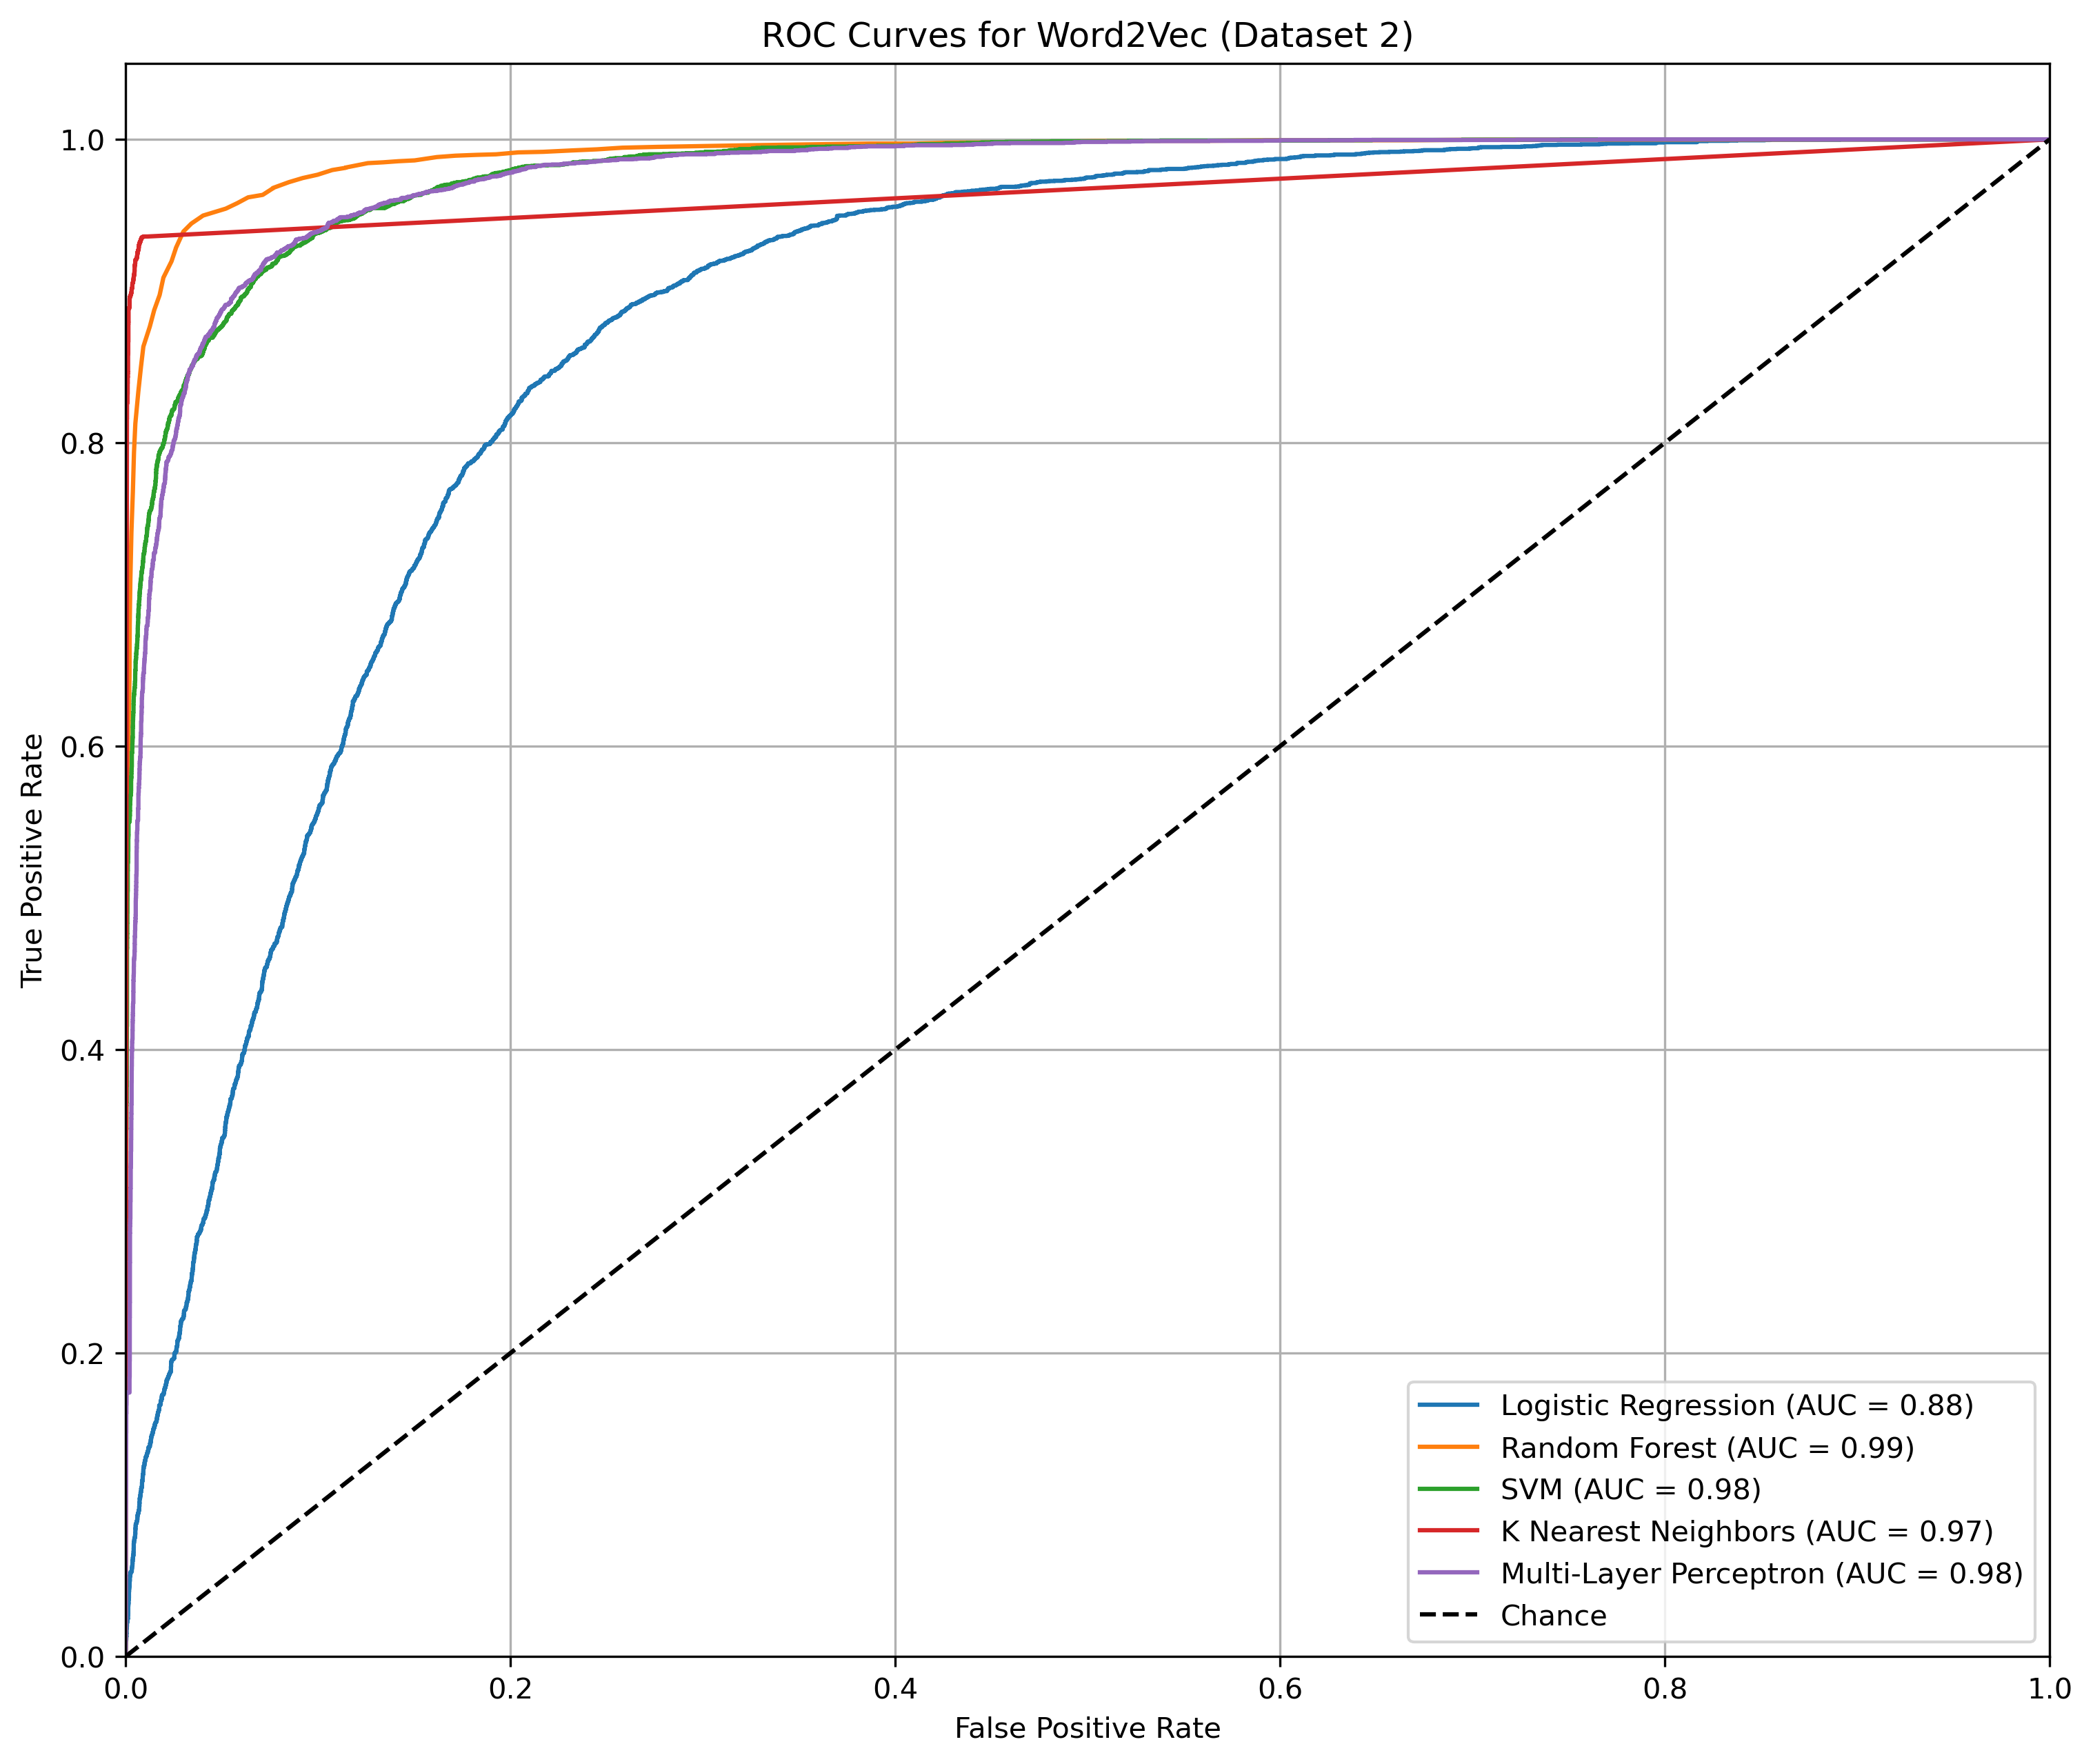

In [65]:
# Higher DPI ROC Plot for better resolution
model_files = [
    ('w2v_lr_model2.pkl', 'Logistic Regression'),
    ('w2v_rf_model2.pkl', 'Random Forest'),
    ('w2v_svc_model2.pkl', 'SVM'),
    ('w2v_knn_model2.pkl', 'K Nearest Neighbors'),
    ('w2v_mlp_model2.pkl', 'Multi-Layer Perceptron')
]
df_test_w2v_unstem.columns = df_test_w2v_unstem.columns.astype(str)
plt.figure(figsize=(12, 10), dpi=300) 
for file, label in model_files:
    with open(file, 'rb') as f:
        model = pickle.load(f)
    try:
        y_proba = model.predict_proba(df_test_w2v_unstem)[:, 1]
    except AttributeError:
        y_proba = model.decision_function(df_test_w2v_unstem)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Word2Vec (Dataset 2)')
plt.legend(loc="lower right")
plt.grid(True)

# Save high-resolution version
plt.savefig("roc_curves_w2v_dataset2.png", dpi=300, bbox_inches='tight')
plt.show()